#Contextualización del Problema
El Ministerio de Educación busca evaluar el impacto de una nueva metodología pedagógica aplicada experimentalmente en el colegio Graham Parker (GP). Para medir su efectividad, se comparan sus resultados finales (N3) contra los del colegio Marteen Sheen (MS), el cual mantuvo el método tradicional. Dado que ambos colegios poseen antecedentes académicos similares, el estudio determinará si la diferencia de promedios actual es estadísticamente significativa o producto del azar.

#1. Obtención y Limpieza de Datos


In [21]:
#Se carga el dataset y se genera la variable de interés
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('notas-alumnos (1).csv')

# Creación de columna Promedio (N1, N2, N3)
df['Promedio_Notas'] = df[['N1', 'N2', 'N3']].mean(axis=1)

print(f"Total de registros cargados: {len(df)}")
print("Valores nulos detectados:", df.isnull().sum().sum())

Total de registros cargados: 395
Valores nulos detectados: 0


#2. Análisis Exploratorio de Datos

Dataset con columna de Promedio:


,colegio,N1,N2,N3,Promedio
0,GP,1.8,2.1,2.1,2.0
1,GP,1.8,1.8,2.1,1.9
2,GP,2.4,2.8,3.5,2.9
3,GP,5.2,4.9,5.2,5.1
4,GP,2.1,3.5,3.5,3.0


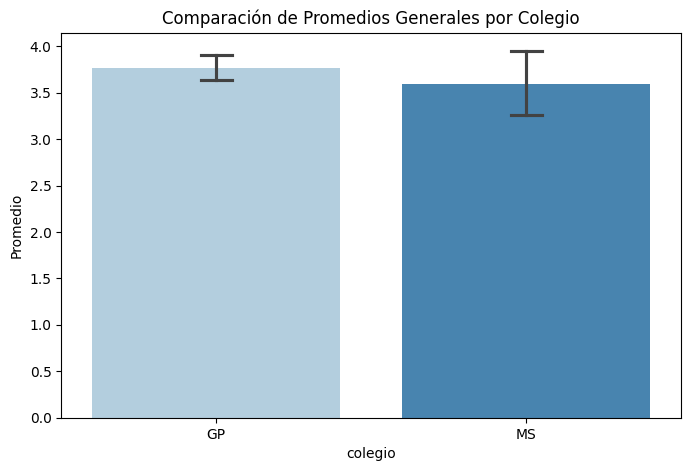

In [29]:
#Caracterización visual de las muestras de los colegios GP y MS

df['Promedio'] = df[['N1', 'N2', 'N3']].mean(axis=1)
df['Promedio'] = df['Promedio'].round(1)
print("Dataset con columna de Promedio:")
display(df[['colegio', 'N1', 'N2', 'N3', 'Promedio']].head())

plt.figure(figsize=(8, 5))
sns.barplot(x='colegio', y='Promedio', data=df, capsize=.1, palette='Blues', hue='colegio', legend=False)
plt.title('Comparación de Promedios Generales por Colegio')
plt.ylabel('Promedio')
plt.show()

#3. Planteamiento de Hipótesis


Se define una prueba de hipótesis para dos muestras independientes con un nivel de significancia $\alpha = 0.05$. Al buscar una "mejora", el test es unilateral de cola derecha.

*Hipótesis Nula ($H_0$):* $\mu_{GP} \leq \mu_{MS}$ La nueva metodología no incrementó el promedio de notas; GP es igual o inferior a MS.

*Hipótesis Alternativa ($H_1$):* $\mu_{GP} > \mu_{MS}$ La nueva metodología aumentó significativamente el promedio de notas en el colegio GP.

#4. Selección y Justificación del Test
Se selecciona la Prueba t de Student para muestras independientes (Test de Welch).

**Justificación:** No conocemos la desviación estándar poblacional y los tamaños de las muestras son muy desiguales (349 vs 46). El test de Welch es el más robusto para comparar medias cuando no se asume igualdad de varianzas.

In [27]:
gp = df[df['colegio'] == 'GP']['Promedio_Notas']
ms = df[df['colegio'] == 'MS']['Promedio_Notas']

# Estadísticos descriptivos
resumen = pd.DataFrame({
    'Colegio': ['GP', 'MS'],
    'Media': [gp.mean(), ms.mean()],
    'Desv. Estándar': [gp.std(), ms.std()],
    'Tamaño Muestra': [len(gp), len(ms)]
})
display(resumen)

# Test estadístico
t_stat, p_val = stats.ttest_ind(gp, ms, equal_var=False, alternative='greater')
print(f"Estadístico t: {t_stat:.4f} | Valor p: {p_val:.4f}")

,Colegio,Media,Desv. Estándar,Tamaño Muestra
0,GP,3.766667,1.299123,349
1,MS,3.594203,1.237866,46


Estadístico t: 0.8830 | Valor p: 0.1904


#5. Conclusiones y análisis
**Interpretación Estadística**

Tras realizar la prueba t de Student para muestras independientes, se obtuvo un estadístico $t$ de 0.8830 y un p-valor de 0.1904.
Dado que el p-valor (0.1904) es mayor que el nivel de significancia $\alpha = 0.05$, no existe evidencia estadística suficiente para rechazar la hipótesis nula ($H_0$).

En términos prácticos, esto significa que la diferencia observada entre el promedio del colegio Graham Parker (3.76) y el colegio Marteen Sheen (3.59) no es lo suficientemente grande como para descartar que se deba a la variabilidad aleatoria de los datos.

**Conclusión**

Desde la perspectiva del Ministerio de Educación, no se puede concluir que la nueva metodología pedagógica haya generado una mejora significativa en el rendimiento académico de los estudiantes. Aunque numéricamente hay una leve ventaja para el colegio GP, esta no tiene validez estadística bajo un nivel de confianza del 95%.